#이진분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
!gdown https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv
To: /content/diabetes.csv
23.9kB [00:00, 51.5MB/s]       


In [5]:
diabetes = pd.read_csv('diabetes.csv')

In [58]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [7]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
cols = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']

diabetes[cols] = diabetes[cols].replace(0,np.nan)

In [10]:
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
for col in cols:
  diabetes[col] = diabetes[col].fillna(diabetes[col].mean())

In [12]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
X = diabetes.iloc[:,:-1]
Y = diabetes.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [18]:
X_train.shape , Y_train.shape , X_test.shape, Y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [19]:
Y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

In [20]:
from sklearn.preprocessing import RobustScaler  # 4분위수를 이용해서 표준화함, 이상치에 강건함
RS = RobustScaler()
X_train = RS.fit_transform(X_train)
X_test = RS.transform(X_test)

In [26]:
X_train.shape

(614, 8)

In [25]:
from tensorflow import keras
from keras import layers

In [52]:
model = keras.Sequential([
    layers.Dense(units = 32, activation = 'relu', input_shape = (8,)),
    layers.Dense(units = 8, activation = 'relu'),
    layers.Dense(units = 8, activation = 'relu'),
    layers.Dense(units = 1, activation = 'sigmoid') #이진분류는 출력이 1개, 2개도 가능함 -> Sigmoid 처리를 해줘야함
])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                288       
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 633
Trainable params: 633
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)

In [55]:
Epochs = 50
Batch_size = 32 # 사이즈가 작으면 W,b 갱신이 많음

History = model.fit(
    X_train,Y_train,
    epochs = Epochs,
    batch_size = Batch_size,
    validation_split = 0.2,
    verbose = 1
)

#val_loss가 떨어지는 방향으로 선택하는게 좋음

Epoch 1/50
16/16 [==============================] - 2s 16ms/step - loss: 0.7187 - accuracy: 0.5214 - val_loss: 0.6568 - val_accuracy: 0.6504
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6237 - accuracy: 0.6823 - val_loss: 0.6042 - val_accuracy: 0.7073
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.7026 - val_loss: 0.5759 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5587 - accuracy: 0.7088 - val_loss: 0.5543 - val_accuracy: 0.7398
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5351 - accuracy: 0.7312 - val_loss: 0.5383 - val_accuracy: 0.7398
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5165 - accuracy: 0.7413 - val_loss: 0.5266 - val_accuracy: 0.7642
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5015 - accuracy: 0.7699 - val_loss: 0.5165 - val_accuracy: 0.7886
Epoch 8/50
16/16 [=

In [56]:
def plot_history(History):
    hist = pd.DataFrame(History.history)
    hist['epoch']= History.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

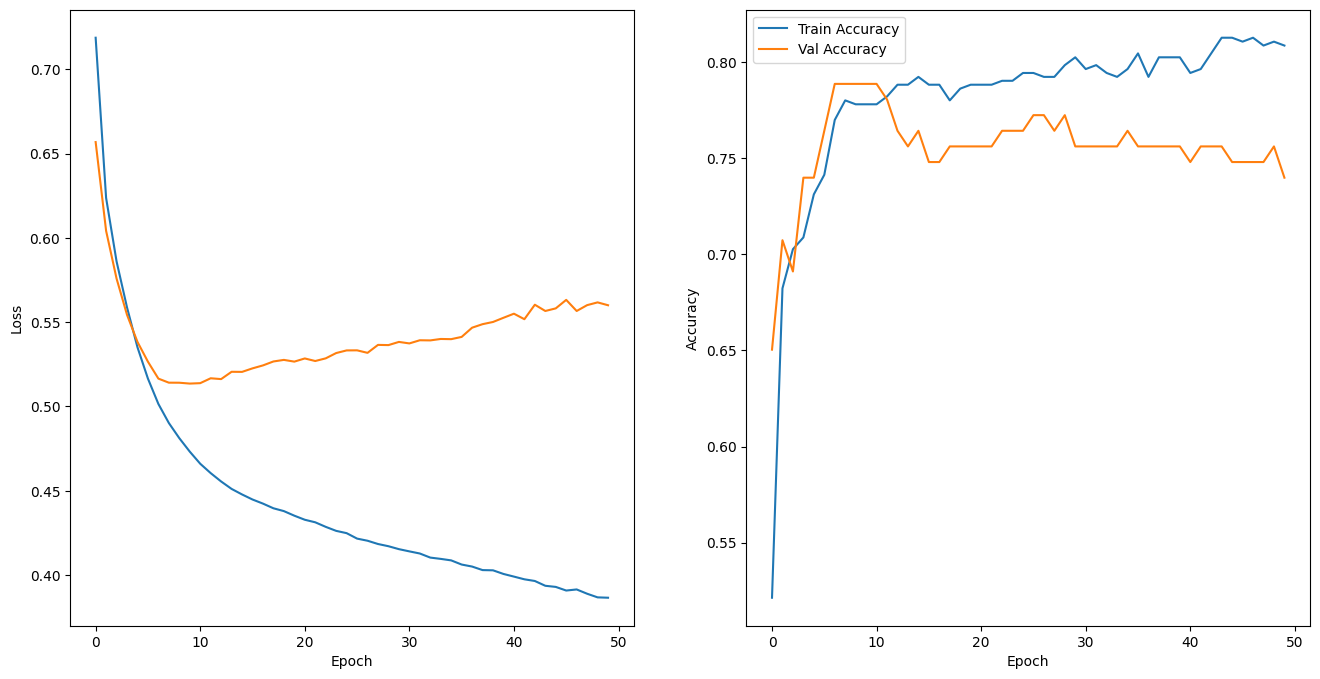

In [57]:
plot_history(History)
#overfitting을 의심할 수 있음

In [59]:
#평가
Y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [62]:
Y_pred[:10]

array([[0.003078  ],
       [0.00851844],
       [0.00456315],
       [0.7203172 ],
       [0.8861325 ],
       [0.00482819],
       [0.91323036],
       [0.00659868],
       [0.02267077],
       [0.29187822]], dtype=float32)

In [65]:
# Sigmoid 값을 Labeling 해야함
Y_pred = (Y_pred > 0.5).astype('int').reshape(-1)

In [61]:
Y_test = Y_test.values

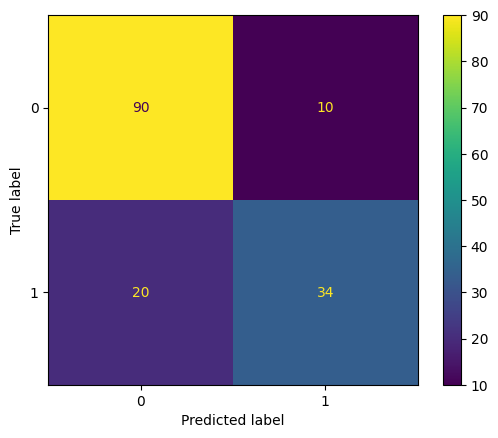

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
acc = accuracy_score(Y_test,Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#다중분류

In [72]:
!gdown https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv
To: /content/iris.csv
5.11kB [00:00, 11.3MB/s]       


In [108]:
iris = pd.read_csv('iris.csv')

In [74]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [76]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [115]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse = False)
OHE.fit(iris[['Species']])
iris[iris['Species'].unique()] = OHE.transform(iris[['Species']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [116]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0.0,0.0,1.0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0.0,0.0,1.0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0.0,0.0,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.0,0.0,1.0


In [117]:
X = iris.iloc[:,[1,2,3,4]]
Y = iris.iloc[:,[-3,-2,-1]]

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [120]:
RS = RobustScaler()
X_train = RS.fit_transform(X_train)
X_test = RS.transform(X_test)

In [123]:
model = keras.Sequential()
model.add(layers.Dense(units = 64, activation = 'relu', input_shape = (4,)))
model.add(layers.Dense(units = 16, activation = 'relu',))
model.add(layers.Dense(units = 3, activation = 'softmax'))

In [124]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)

In [125]:
History = model.fit(
    X_train,Y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 1
)


Epoch 1/100
3/3 [==============================] - 1s 117ms/step - loss: 1.1070 - accuracy: 0.2812 - val_loss: 1.1255 - val_accuracy: 0.1667
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 1.0602 - accuracy: 0.4688 - val_loss: 1.0769 - val_accuracy: 0.4167
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: 1.0162 - accuracy: 0.5938 - val_loss: 1.0344 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 0.9761 - accuracy: 0.6875 - val_loss: 0.9963 - val_accuracy: 0.6250
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.9378 - accuracy: 0.6979 - val_loss: 0.9598 - val_accuracy: 0.6667
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.9017 - accuracy: 0.7188 - val_loss: 0.9250 - val_accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 0s 43ms/step - loss: 0.8665 - accuracy: 0.7396 - val_loss: 0.8907 - val_accuracy: 0.7083
Epoch 8/100
3/3 [==

In [126]:
def plot_history(History):
    hist = pd.DataFrame(History.history)
    hist['epoch']= History.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()

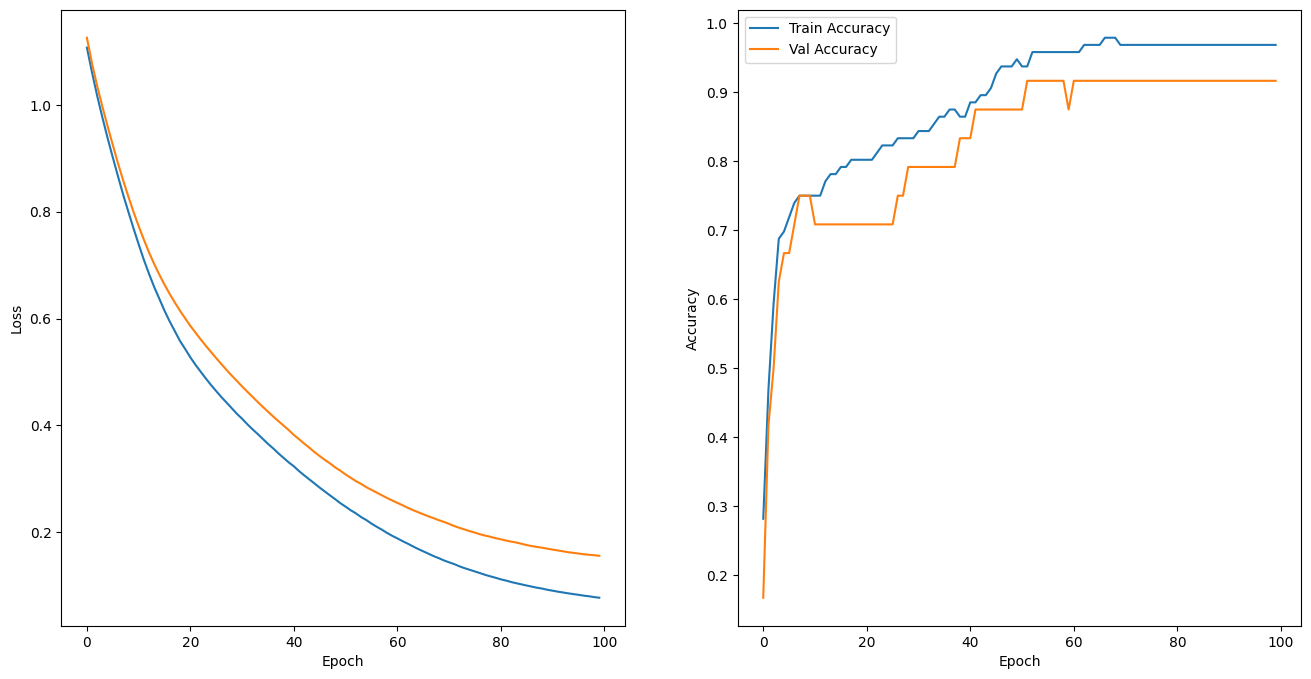

In [127]:
plot_history(History)

In [128]:
Y_pred = model.predict(X_test)

1/1 [==============================] - 0s 185ms/step


In [129]:
Y_pred[:5]

array([[5.3892443e-05, 1.6512419e-03, 9.9829483e-01],
       [2.2136360e-02, 9.2494118e-01, 5.2922487e-02],
       [8.9992045e-06, 4.7773341e-04, 9.9951321e-01],
       [9.9343026e-01, 6.4164535e-03, 1.5341213e-04],
       [1.5219420e-04, 1.1701229e-02, 9.8814660e-01]], dtype=float32)

In [130]:
Y_test[:5]

,Iris-setosa,Iris-versicolor,Iris-virginica
136,0.0,0.0,1.0
55,0.0,1.0,0.0
144,0.0,0.0,1.0
34,1.0,0.0,0.0
139,0.0,0.0,1.0


In [137]:
Y_pred = np.argmax(Y_pred, axis = 1) # 가장 큰 값을 인덱스로 돌려줌

In [134]:
Y_test = Y_test.values

In [135]:
Y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [138]:
Y_test = np.argmax(Y_test, axis = 1)

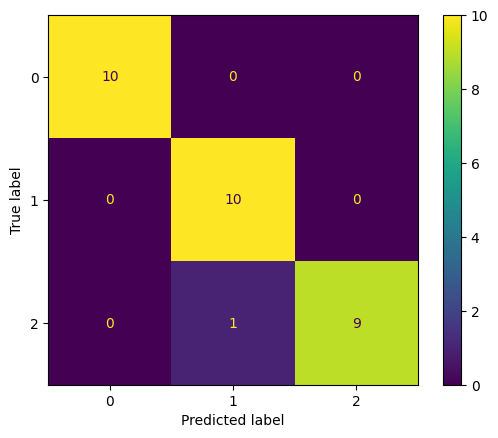

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
acc = accuracy_score(Y_test,Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#다중분류

In [140]:
!gdown https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv
To: /content/penguins.csv
13.5kB [00:00, 21.1MB/s]       


In [175]:
penguins = pd.read_csv('penguins.csv', na_values = ['.'])

In [152]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [153]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [154]:
penguins.shape

(344, 7)

In [176]:
penguins = penguins.dropna()

In [156]:
penguins.shape

(333, 7)

In [157]:
penguins.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [158]:
penguins.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [159]:
penguins['species'].unique(), penguins['island'].unique(), penguins['sex'].unique()

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Torgersen', 'Biscoe', 'Dream'], dtype=object),
 array(['MALE', 'FEMALE'], dtype=object))

In [177]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
penguins['species'] = LE.fit_transform(penguins['species'])
penguins['sex'] = LE.fit_transform(penguins['sex'])

In [178]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,1
1,0,Torgersen,39.5,17.4,186.0,3800.0,0
2,0,Torgersen,40.3,18.0,195.0,3250.0,0
4,0,Torgersen,36.7,19.3,193.0,3450.0,0
5,0,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,Biscoe,47.2,13.7,214.0,4925.0,0
340,2,Biscoe,46.8,14.3,215.0,4850.0,0
341,2,Biscoe,50.4,15.7,222.0,5750.0,1
342,2,Biscoe,45.2,14.8,212.0,5200.0,0


In [186]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse = False )
OHE.fit(penguins[['island']])
penguins[penguins['island'].unique()] = OHE.transform(penguins[['island']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [187]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Torgersen,Biscoe,Dream
0,0,Torgersen,39.1,18.7,181.0,3750.0,1,0.0,0.0,1.0
1,0,Torgersen,39.5,17.4,186.0,3800.0,0,0.0,0.0,1.0
2,0,Torgersen,40.3,18.0,195.0,3250.0,0,0.0,0.0,1.0
4,0,Torgersen,36.7,19.3,193.0,3450.0,0,0.0,0.0,1.0
5,0,Torgersen,39.3,20.6,190.0,3650.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
338,2,Biscoe,47.2,13.7,214.0,4925.0,0,1.0,0.0,0.0
340,2,Biscoe,46.8,14.3,215.0,4850.0,0,1.0,0.0,0.0
341,2,Biscoe,50.4,15.7,222.0,5750.0,1,1.0,0.0,0.0
342,2,Biscoe,45.2,14.8,212.0,5200.0,0,1.0,0.0,0.0


In [188]:
from sklearn.preprocessing import RobustScaler
RE = RobustScaler()
penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = RE.fit_transform(penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])


In [189]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Torgersen,Biscoe,Dream
0,0,Torgersen,-0.593407,0.451613,-0.695652,-0.244898,1,0.0,0.0,1.0
1,0,Torgersen,-0.549451,0.032258,-0.478261,-0.204082,0,0.0,0.0,1.0
2,0,Torgersen,-0.461538,0.225806,-0.086957,-0.653061,0,0.0,0.0,1.0
4,0,Torgersen,-0.857143,0.645161,-0.173913,-0.489796,0,0.0,0.0,1.0
5,0,Torgersen,-0.571429,1.064516,-0.304348,-0.326531,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
338,2,Biscoe,0.296703,-1.161290,0.739130,0.714286,0,1.0,0.0,0.0
340,2,Biscoe,0.252747,-0.967742,0.782609,0.653061,0,1.0,0.0,0.0
341,2,Biscoe,0.648352,-0.516129,1.086957,1.387755,1,1.0,0.0,0.0
342,2,Biscoe,0.076923,-0.806452,0.652174,0.938776,0,1.0,0.0,0.0


In [190]:
X = penguins.iloc[:,2:]
Y = penguins.iloc[:,0]

In [197]:
X.shape, Y.shape

((333, 8), (333,))

In [198]:
model = keras.Sequential()
model.add(layers.Dense(units = 64, activation = 'relu', input_shape = (8,)))
model.add(layers.Dense(units = 32, activation = 'relu'))
model.add(layers.Dense(units = 3, activation = 'softmax'))

In [199]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [200]:
History = model.fit(
    X,Y,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 1.0351 - accuracy: 0.5075 - val_loss: 0.9276 - val_accuracy: 0.9851
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.8739 - accuracy: 0.8346 - val_loss: 0.8231 - val_accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7318 - accuracy: 0.8835 - val_loss: 0.6835 - val_accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6026 - accuracy: 0.8985 - val_loss: 0.5441 - val_accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4859 - accuracy: 0.9135 - val_loss: 0.4090 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3865 - accuracy: 0.9361 - val_loss: 0.2911 - val_accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3047 - accuracy: 0.9699 - val_loss: 0.2005 - val_accuracy: 1.0000
Epoch 8/100
9/9 [=========

In [206]:
Y_pred = model.predict(X)

11/11 [==============================] - 0s 3ms/step


In [207]:
Y_pred = np.argmax(Y_pred, axis = 1)

In [208]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [211]:
Y = Y.values

In [212]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [214]:
acc = accuracy_score(Y_pred, Y)
acc

1.0

In [215]:
def plot_history(History):
    hist = pd.DataFrame(History.history)
    hist['epoch']= History.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')

    plt.legend()
    plt.show()


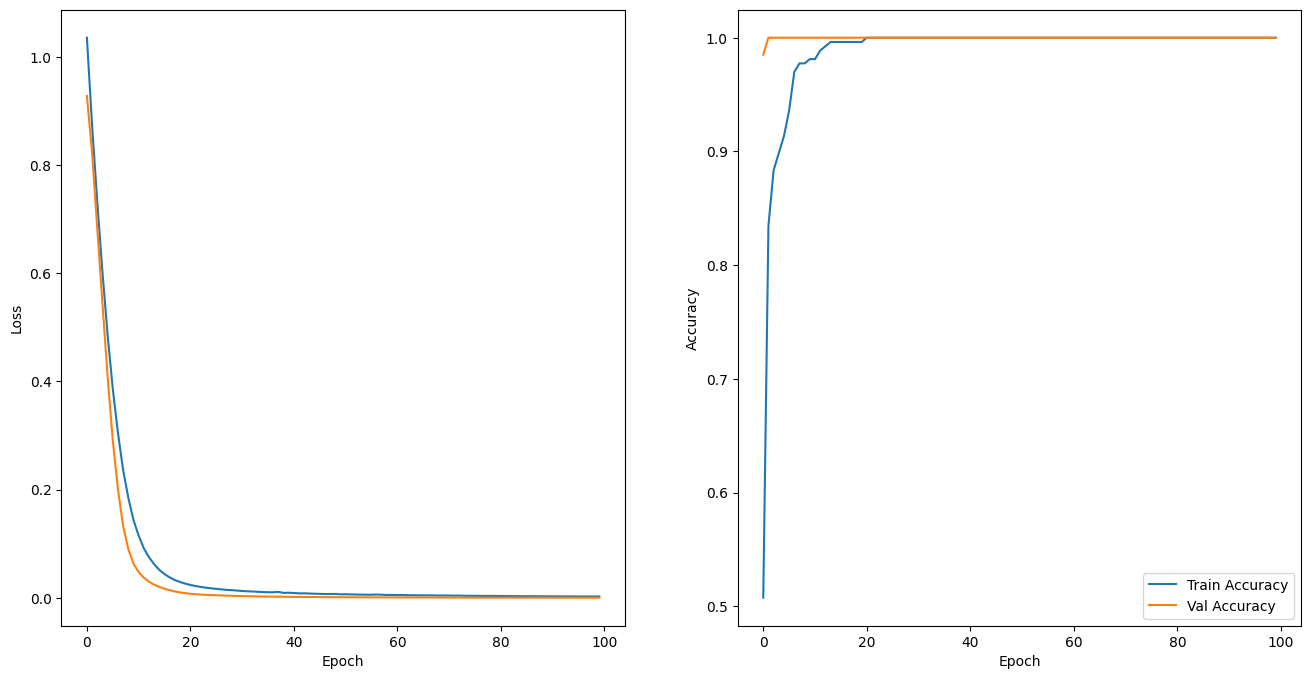

In [216]:
plot_history(History)